## $\text{Written by EG Timerise aka Dr.E}$

$\text{ A simple introduction review of some basic R coding.}$

$\text{ Data set pulled from kaggle.com}$

$\text{An IBM sample data set}$

$\text{https://www.kaggle.com/blastchar/telco-customer-churn}$

$\text{Objective : Analyze customer data and develop customer focused retention plans.}$

$\text{First lets load the library 'readr' used to import our csv file.}$


$\text{A special note:}$

$\text{Note we are dealing with an observational data set and not a experimental data set.}$

$\text{We can use 'install.packages("tidyverse") ' to install the following libraries}$

$\text{'ggplot2' , 'tibble' , 'tidyr' , 'readr', 'purr','dplyr' , 'stringr'  , and 'forcats',etc...}$

$\text{We still need to load our desire library if we want to use it!}$


$\text{Some background information about the various variables:}$

#### customerID - Customer ID

#### gender - Customer gender (female, male)

#### SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

#### Partner -Whether the customer has a partner or not (Yes, No)

#### Dependents - Whether the customer has dependents or not (Yes, No)

#### tenure - Number of months the customer has stayed with the company

#### PhoneService - Whether the customer has a phone service or not (Yes, No)

#### MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

#### InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

#### OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

#### OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

#### DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

#### TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

#### StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

#### StreamingMovies -Whether the customer has streaming movies or not (Yes, No, No internet service)

#### Contract - The contract term of the customer (Month-to-month, One year, Two year)

#### PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

#### PaymentMethod -The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#### MonthlyCharges - The amount charged to the customer monthly

#### TotalCharges -The total amount charged to the customer

#### Churn - Whether the customer churned or not (Yes or No), stop using service vs. conti. service

In [1]:
library(readr) ##loading the readr library 
#now importing our data set into the system
data1<- read_csv("C:/Users/dragon/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_integer(),
  tenure = col_integer(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


In [2]:
dim(data1) ## lets you view the dimension of our data set
## row vs columns, much like pythons 'data1.shape' format

[1] 7043   21

$\text{So it looks like we have 7043 observations and 21 variables.}$

$\text{Lets check out the first few observations.}$

In [3]:
head(data1,n=10) ## checking out the first 10 observations of our data 

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


$\text{From the above code, we can see the general layout of a few of the 21 variables.}$

$\text{Our general target variable, Churn, was placed at the end of the data set. This is a bit different from the standard method.}$

$\text{Generally the target variable is placed at the start of the data set, but it doesn't really matter.}$

$\text{Lets change the data set to fix our desire layout.}$


In [4]:
library(dplyr) ## a library useful for transforming data frames
##check out the following pdf written 2018, for more about the library
#https://cran.r-project.org/web/packages/dplyr/dplyr.pdf

### Applying a chain/pipline method of coding inplace of using (())
## Think of %>% as the word then, check it in action below!
data1=data1 %>%
    select(Churn,everything(),-c(customerID))  ## switch the order and droping ID

data1=data1 %>% 
    mutate_if(is.character,as.factor) ##changing chr types to factor types

data1$SeniorCitizen<-factor(data1$SeniorCitizen) ## a bit weird how this one was already in number form


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
head(data1)

Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
No,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
No,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
No,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
Yes,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50


$\text{Notice that I removed the customerID, for the type of analysis I am  conducting the ID numbers are not needed.}$

$\text{I also turned the chr type variables into factor types.}$

$\text{We want to review  the data to come up with a good retention plan.}$

$\text{Lets dive deeper into the data to develope some simple introductory analysis!}$

In [6]:
summary(data1) # summary() gives us quick single variable information

 Churn         gender     SeniorCitizen Partner    Dependents     tenure     
 No :5174   Female:3488   0:5901        No :3641   No :4933   Min.   : 0.00  
 Yes:1869   Male  :3555   1:1142        Yes:3402   Yes:2110   1st Qu.: 9.00  
                                                              Median :29.00  
                                                              Mean   :32.37  
                                                              3rd Qu.:55.00  
                                                              Max.   :72.00  
                                                                             
 PhoneService          MultipleLines     InternetService
 No : 682     No              :3390   DSL        :2421  
 Yes:6361     No phone service: 682   Fiber optic:3096  
              Yes             :2971   No         :1526  
                                                        
                                                        
                                  

$\text{From the above out put , we can see that our data set is mix. (also from the pre-information given.}$

$\text{From TotalCharges, we see that we have some NA's to fix.}$

$\text{Lets check out TotalCharges in greater detail.}$

In [7]:
head(sort(data1$TotalCharges))## sort by default starts from lowest value than biggest
#Although we already knew 18.8 was the lowest written value

[1] 18.80 18.85 18.85 18.90 19.00 19.05

In [8]:
head(sort(data1$tenure),n=13)## sort by default starts from lowest value than biggest


[1] 0 0 0 0 0 0 0 0 0 0 0 1 1

$\text{To be  truthful, we really do not know what the nans in TotalCharges were suppose to be.}$

$\text{We could replace the values with MonthlyCharges+(MonthlyCharges*tenure) , or etc...,or etc..}$

$\text{It seems likely that the 11 observations with NAs for TotalCharges are those with less than a month of use.}$

$\text{We could just remove the observations, since its only 11 out of 7043, but lets check out the weird observations first.}$

In [9]:
data1[rowSums(is.na(data1))>0,]## using boolean logic if any row has an NA 'True/1' then it will print

## df[row,column] style format much like pythons 'df.iloc[row,column] ' kind of



Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NA
No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NA
No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NA
No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NA
No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NA
No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NA
No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NA
No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NA
No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NA
No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NA


$\text{As I suspected, the observations with NAs for TotalCharges are accounts with less than one month.}$

$\text{It appears that charges are only made or counted at the end of a month.}$

$\text{To stay with the input logic, we can set our NA values to 0.}$

In [10]:
data1$TotalCharges[is.na(data1$TotalCharges)] <-1  ## This is replacing the na's in totalcharges with one
## a bit different from python, where you need to save your changes in a new object. 'data1.totalcharges.replace(np.nan,1,inplace=True)'

$\text{Now lets check for duplicate observations in our data set!}$

In [11]:
dim(data1)

[1] 7043   20

In [12]:
library(dplyr)

In [13]:
dim(distinct(data1)) ## removes duplicate rows based on each columns

[1] 7021   20

$\text{There does not appear to be any duplicate observations in the data set.}$

$\text{With python , we could have used 'data1.duplicated().sum()' to check for duplicate rows.}$

$\text{Now lets check out the various types of variables we are dealing with in R.}$

In [14]:
## glimpse is a dplyr tool, use str() if not using dplyr in R , str() is really messy looking
glimpse(data1) ## shows the deeper information about the data set
## Its much like pythons  'data1.info() ' 

## In R could also use the class function 'class(data1$gender)'
## In python it would be 'type(data1.gender)'

Observations: 7,043
Variables: 20
$ Churn            <fctr> No, No, Yes, No, Yes, Yes, No, No, Yes, No, No, N...
$ gender           <fctr> Female, Male, Male, Male, Female, Female, Male, F...
$ SeniorCitizen    <fctr> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Partner          <fctr> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No...
$ Dependents       <fctr> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fctr> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Ye...
$ MultipleLines    <fctr> No phone service, No, No, No phone service, No, Y...
$ InternetService  <fctr> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fib...
$ OnlineSecurity   <fctr> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes,...
$ OnlineBackup     <fctr> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, N...
$ DeviceProtection <fctr> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, N...
$ TechSupport     

$\text{We can see that the variables are listed as fctr, dbl, or int type.}$

In [15]:
summary(data1) # summary() gives us quick single variable information

 Churn         gender     SeniorCitizen Partner    Dependents     tenure     
 No :5174   Female:3488   0:5901        No :3641   No :4933   Min.   : 0.00  
 Yes:1869   Male  :3555   1:1142        Yes:3402   Yes:2110   1st Qu.: 9.00  
                                                              Median :29.00  
                                                              Mean   :32.37  
                                                              3rd Qu.:55.00  
                                                              Max.   :72.00  
 PhoneService          MultipleLines     InternetService
 No : 682     No              :3390   DSL        :2421  
 Yes:6361     No phone service: 682   Fiber optic:3096  
              Yes             :2971   No         :1526  
                                                        
                                                        
                                                        
             OnlineSecurity              OnlineBackup 


$\text{From the above summary output, we can see our sample data set contains mostly customers who do not churn.}$

$\text{Now lets dive deeper into the data set by conducting some explortary data analysis (EDA).}$

In [16]:
## I really like the dplyr filter method, so lets first use it in our EDA
dim(data1 %>% filter(data1$Churn == 'Yes', data1$Contract=='Month-to-month'))
## we used the dim() to see how many observations matched having the following traits:
## Churn, yes to using PaperlessBilling , and on a month-to-month contract
## The output shows 1655 out of the 1869 churn observations matched these restrictions so roughly 88.5% of the churn observations matched
### This isn't a clear cut way to explore the data, but its an interesting method for creating sub data sets with easy in R
### The dplyr library has some sql abilites as well, which I will try out at a later time.
### lets check out how this random guess of PaperlessBilling and Contract type play out overall

[1] 1655   20

In [17]:
dim(data1 %>% filter( data1$Contract=='Month-to-month'))
## we see 3875 of the total sample has Paperlessbilling and Month-to-month 
## Thats 3875-1655= 2220 observations that are not what we want
## Lets apply some better methods for data exploration.

[1] 3875   20

$\text{Its good to remember , we are not conducting any predictive models.}$

$\text{We just want to look at the data and make general observations for how to maybe reduce churn.}$

$\text{Think of this as reverse feature engineering, where we quickly find areas/sub-variables with highly seen churn.}$

$\text{After pointing out these weak sub-variables we can then make suggestions on which subgroups need our attention.}$

$\text{Lets first draw up some general plots, then dive deeper with some common statistical methods for deterimining variable significance.}$

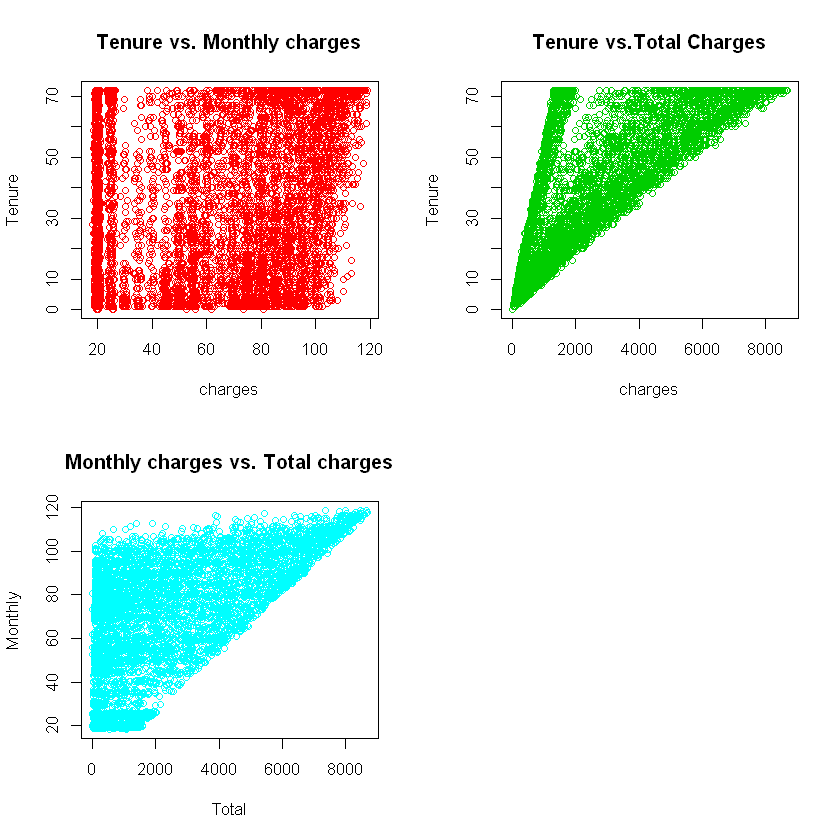

In [18]:
par(mfrow=c(2,2)) #one of my favorite R tools creates muitlp sub windows for plots
plot(data1$tenure~data1$MonthlyCharges,main='Tenure vs. Monthly charges',xlab='charges',ylab='Tenure',col=2)
plot(data1$tenure~data1$TotalCharges,main='Tenure vs.Total Charges',xlab='charges',ylab='Tenure',col=3 )
plot(data1$MonthlyCharges~data1$TotalCharges, main='Monthly charges vs. Total charges',xlab='Total',ylab='Monthly',col=5)
par(mfrow=c(1,1))

$\text{Only a few things that stood out to me from the plots.}$

$\text{There seems to be a gap in the area around total charges of 2000.}$

$\text{As monthly charges increase the upper limite of total charges increases for the most part.}$

$\text{Monthly charges between 25 and 40 seem to have a weak fill for tenure.}$

$\text{All very interesting observations, but lets dive deeper.}$

$\text{Lets conduct some frequency plots.}$

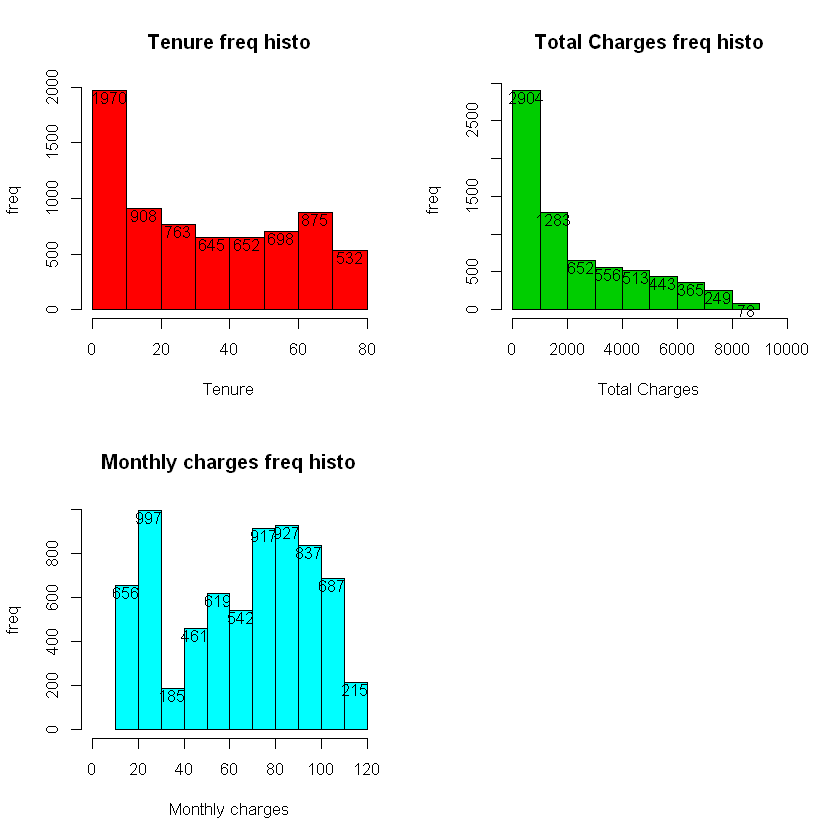

In [19]:
par(mfrow=c(2,2))
## if you save your hist() , it actually stores each bin count,midpoint of each stack,the density of each stack , etc..
## can use text fucntion to add text to plots
b<-hist(data1$tenure,xlim=c(0,80),breaks=10,main='Tenure freq histo',ylab='freq',xlab='Tenure',col=2)
text(b$mids,b$counts,labels=b$counts, adj=c(0.5, 1))

e<-hist(data1$TotalCharges,xlim=c(0,10000),breaks=8,main='Total Charges freq histo',ylab='freq',xlab='Total Charges',col=3 )
text(e$mids,e$counts,labels=e$counts, adj=c(0.5,1))

t<-hist(data1$MonthlyCharges,xlim=c(0,120),breaks=8, main='Monthly charges freq histo',ylab='freq',xlab='Monthly charges',col=5)
text(t$mids,t$counts,labels=t$counts, adj=c(0.5, 1))

$\text{Seems from the freq histograms that the large cluster of customers have high total charges (2904 customers).}$

$\text{A large cluster of customers have a low teneure count (1970 customers).}$

$\text{Monthly charges seem to be less skewed , but its interesting to see two extremely low clusters.}$

In [20]:
library(ggplot2)

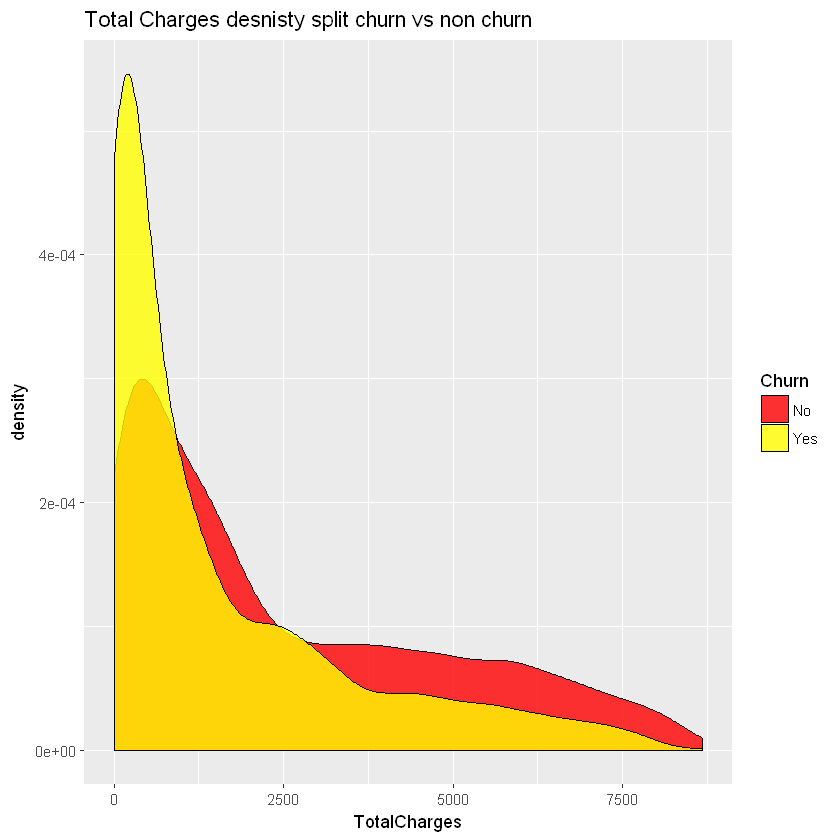

In [21]:
data1 %>% ggplot(aes(x=TotalCharges,fill=Churn))+ geom_density(alpha=0.8)+scale_fill_manual(values=c('red','yellow'))+labs(title='Total Charges desnisty split churn vs non churn' )

$\text{Ok, so the above plot is one of two graphs that I really really like for quick variable review.}$

$\text{The other visual add being various forms of cross tables.}$

$\text{From plots like these , we can easily see the various sub groups that can be split for feature engineering}$

$\text{From the plot we can see two locations that can be cut for variable transformation.}$

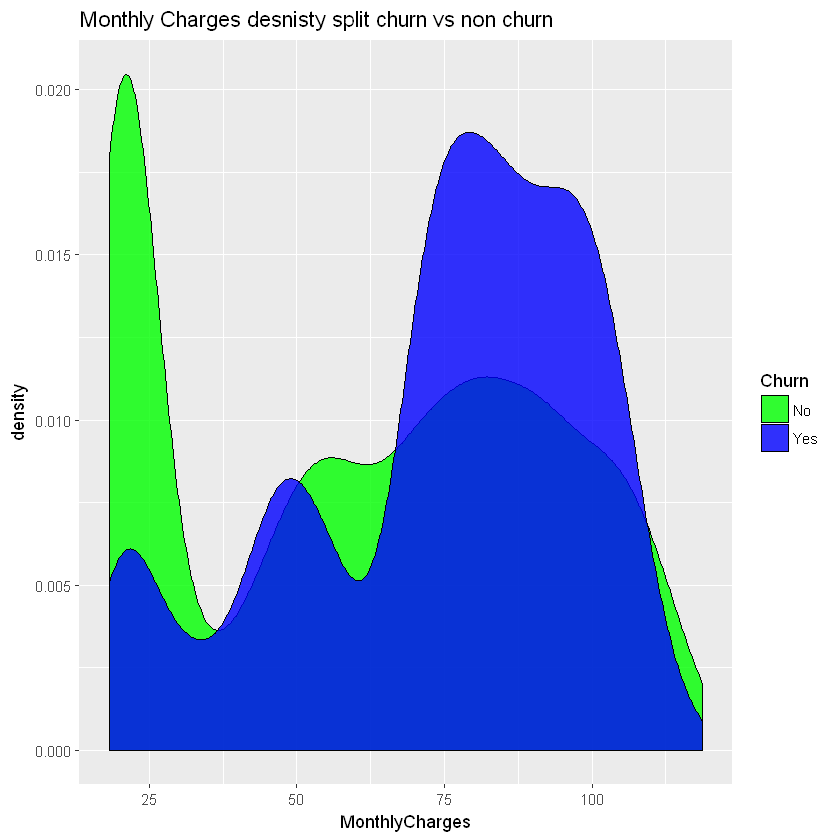

In [22]:
data1 %>% ggplot(aes(x=MonthlyCharges,fill=Churn))+ geom_density(alpha=0.8)+scale_fill_manual(values=c('green','blue'))+labs(title='Monthly Charges desnisty split churn vs non churn' )

$\text{In this plot we also see two spots were we can cut information for feature transformation.}$

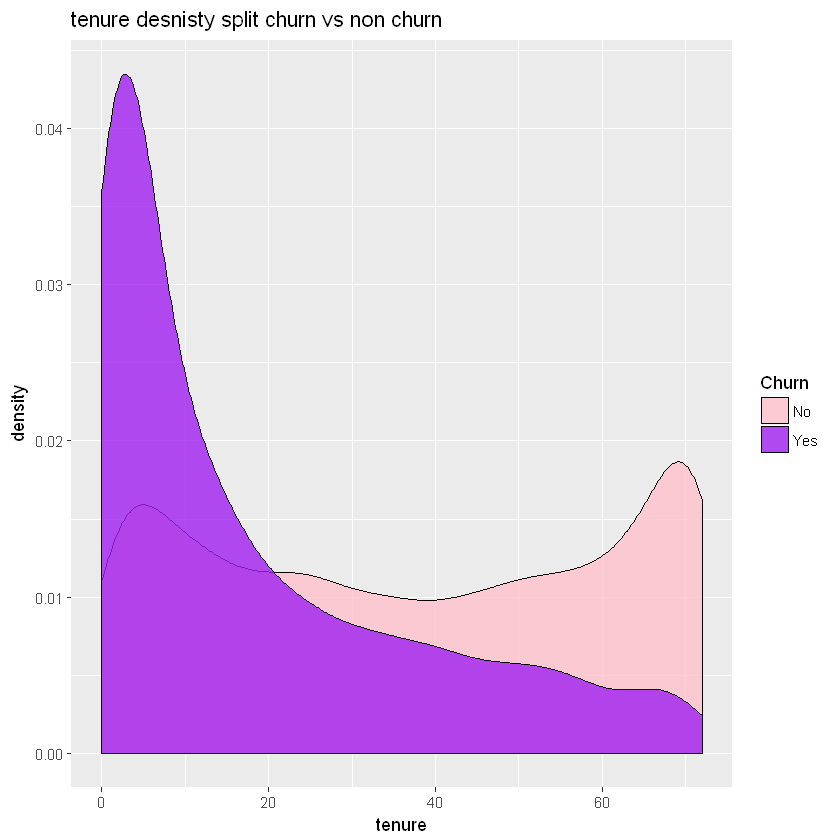

In [23]:
data1 %>% ggplot(aes(x=tenure,fill=Churn))+ geom_density(alpha=0.8)+scale_fill_manual(values=c('pink','purple'))+labs(title='tenure desnisty split churn vs non churn' )

$\text{In this plot we only see on section that would be good for feature transformation.}$

$\text{ The cool and powerful thing about each of these plots is that the interesting sections can be grouped together to form a better predictor/variable for churn.}$

$\text{The purposed groupd sections would boil down to a sub group of traits that are observed to be possibly import when it comes to who churn.}$

$\text{Its import to note that this isn't an experimental data set, so in truth we can't say our found/formed sub group is a really driving force for churn.}$

$\text{Although from a predictive stand point, assuming everything stays generally the same in the future, its a predictor group to look at.}$

$\text{Will add way more to this,soon.....!}$
